In [24]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import my_library.common_analysis_tools as ct
import my_library.kinematic_cuts as kcuts
import my_library.constants as constants

In [25]:
ROOT.gStyle.SetOptStat(0)
ROOT.EnableImplicitMT()

In [26]:
df_pipkmks_data = ct.get_dataframe('pipkmks', 'spring', 'data')
df_pipkmks_phasespace = ct.get_dataframe('pipkmks', 'spring', 'phasespace')

df_pimkpks_data = ct.get_dataframe('pimkpks', 'spring', 'data')
df_pimkpks_phasespace = ct.get_dataframe('pimkpks', 'spring', 'phasespace')

In [27]:
hist_pipkmks_nocut_data = df_pipkmks_data.Histo1D(('pipkmks_nocut', 'M(#pi^{+}K^{-}K_{S})', 70, 1.1, 1.8), 'pipkmks_m')
hist_pipkmks_cut_data = df_pipkmks_data.Filter('kmks_m < 1.05').Histo1D(('pipkmks_cut', 'M(#pi^{+}K^{-}K_{S})', 70, 1.1, 1.8), 'pipkmks_m')
hist_pipkmks_nocut_phasespace = df_pipkmks_phasespace.Histo1D(('pipkmks_nocut', 'M(#pi^{+}K^{-}K_{S})', 70, 1.1, 1.8), 'pipkmks_m')
hist_pipkmks_cut_phasespace = df_pipkmks_phasespace.Filter('kmks_m < 1.05').Histo1D(('pipkmks_cut', 'M(#pi^{+}K^{-}K_{S})', 70, 1.1, 1.8), 'pipkmks_m')

hist_pimkpks_nocut_data = df_pimkpks_data.Histo1D(('pimkpks_nocut', 'M(#pi^{-}K^{+}K_{S})', 70, 1.1, 1.8), 'pimkpks_m')
hist_pimkpks_cut_data = df_pimkpks_data.Filter('kpks_m < 1.05').Histo1D(('pimkpks_cut', 'M(#pi^{-}K^{+}K_{S})', 70, 1.1, 1.8), 'pimkpks_m')
hist_pimkpks_nocut_phasespace = df_pimkpks_phasespace.Histo1D(('pimkpks_nocut', 'M(#pi^{-}K^{+}K_{S})', 70, 1.1, 1.8), 'pimkpks_m')
hist_pimkpks_cut_phasespace = df_pimkpks_phasespace.Filter('kpks_m < 1.05').Histo1D(('pimkpks_cut', 'M(#pi^{-}K^{+}K_{S})', 70, 1.1, 1.8), 'pimkpks_m')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


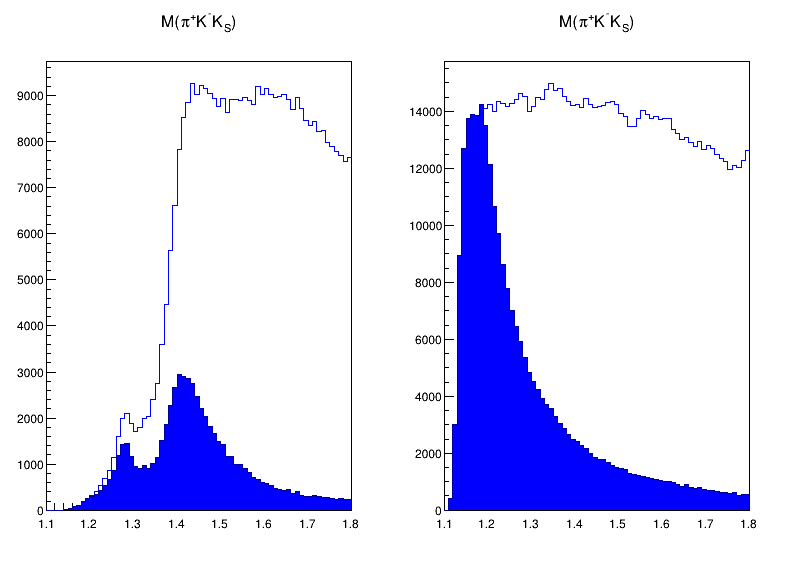

In [28]:
c = ROOT.TCanvas('c', 'c', 800, 600)
c.Divide(2,1)

hist_pipkmks_nocut_data.SetLineColor(ROOT.kBlue)
hist_pipkmks_cut_data.SetFillColor(ROOT.kBlue)
hist_pipkmks_nocut_phasespace.SetLineColor(ROOT.kBlue)
hist_pipkmks_cut_phasespace.SetFillColor(ROOT.kBlue)

c.cd(1)
hist_pipkmks_nocut_data.Draw()
hist_pipkmks_cut_data.Draw('same')
c.cd(2)
hist_pipkmks_nocut_phasespace.Draw()
hist_pipkmks_cut_phasespace.Draw('same')
c.Draw()

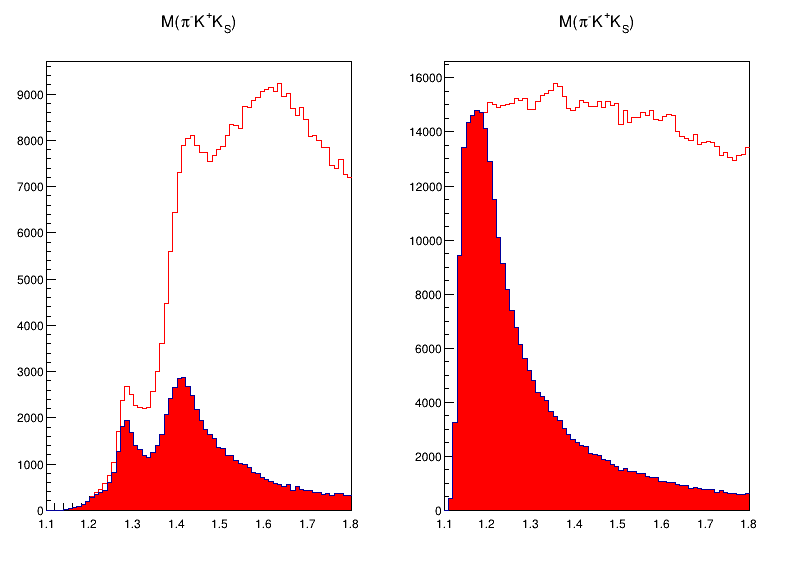

In [29]:
c.Clear()
c.Divide(2,1)

hist_pimkpks_nocut_data.SetLineColor(ROOT.kRed)
hist_pimkpks_cut_data.SetFillColor(ROOT.kRed)
hist_pimkpks_nocut_phasespace.SetLineColor(ROOT.kRed)
hist_pimkpks_cut_phasespace.SetFillColor(ROOT.kRed)

c.cd(1)
hist_pimkpks_nocut_data.Draw()
hist_pimkpks_cut_data.Draw('same')
c.cd(2)
hist_pimkpks_nocut_phasespace.Draw()
hist_pimkpks_cut_phasespace.Draw('same')
c.Draw()

In [30]:
df_pipkmks_data = df_pipkmks_data.Filter('kmks_m < 1.05')
df_pipkmks_phasespace = df_pipkmks_phasespace.Filter('kmks_m < 1.05')

In [31]:
m_kkpi = ROOT.RooRealVar("m_kkpi", "m_kkpi", 1.16, 1.7)
dh = ROOT.RooDataHist("dh", "dh", ROOT.RooArgList(m_kkpi), hist_pipkmks_cut_data.GetPtr())
psh = ROOT.RooDataHist("psh", "psh", ROOT.RooArgList(m_kkpi), hist_pipkmks_cut_phasespace.GetPtr())

In [32]:
voight_resoltion = constants.F1_PIPKMKS_VOIGHT_SIGMA
voight_resolution_error = constants.F1_PIPKMKS_VOIGHT_SIGMA_ERROR

# set up a roofit voightian with a mean of 1.285, width of 0.024, and a sigma of 0.013
voight_m_1285 = ROOT.RooRealVar("voight_m_1285", "voight_m_1285", 1.281, 1.2, 1.3)
voight_width_1285 = ROOT.RooRealVar("voight_width_1285", "voight_width_1285", 0.023, 0.01, 0.075)
voight_sigma_1285 = ROOT.RooRealVar("voight_sigma_1285", "voight_sigma_1285", voight_resoltion, 0.01, 0.5)
voight_sigma_1285.setError(voight_resolution_error)
voight_1285 = ROOT.RooVoigtian("voight_1285", "voight_1285", m_kkpi, voight_m_1285, voight_width_1285, voight_sigma_1285)

voight_m_1420 = ROOT.RooRealVar("voight_m_1420", "voight_m_1420", 1.420, 1.35, 1.45)
voight_width_1420 = ROOT.RooRealVar("voight_width_1420", "voight_width_1420", 0.07, 0.04, 0.075)
voight_sigma_1420 = ROOT.RooRealVar("voight_sigma_1420", "voight_sigma_1420", voight_resoltion, 0.01, 0.5)
voight_sigma_1420.setError(voight_resolution_error)
voight_1420 = ROOT.RooVoigtian("voight_1420", "voight_1420", m_kkpi, voight_m_1420, voight_width_1420, voight_sigma_1420)

# hold the voight parameters fixed
voight_sigma_1285.setConstant(True)
# voight_m_1285.setConstant(True)
# voight_width_1285.setConstant(True)
voight_sigma_1420.setConstant(True)
voight_m_1420.setConstant(True)
voight_width_1420.setConstant(True)

In [33]:
phasespace = ROOT.RooHistPdf('phasespace', 'phasespace', m_kkpi, psh)

In [34]:
n_f1_1285 = ROOT.RooRealVar("n_f1_1285", "n_f1_1285", 10000, 0.0, 1000000000)
n_f1_1420 = ROOT.RooRealVar("n_f1_1420", "n_f1_1420", 10000, 0.0, 1000000000)
n_phasespace = ROOT.RooRealVar("n_phasespace", "n_phasespace", 10000, 0.0, 1000000000)

combined_pdf = ROOT.RooAddPdf('combined_pdf', 'combined_pdf', ROOT.RooArgList(voight_1285, voight_1420, phasespace), ROOT.RooArgList(n_f1_1285, n_f1_1420, n_phasespace))

In [35]:
fit_result = combined_pdf.fitTo(dh, ROOT.RooFit.Save())